<H1 align='center'>Ultimate Inc - Take Home Challenge</H1>

<H2>Task 1</H2>

<H3>Imports</H3>

In [658]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import json

<H3>Read JSON into pandas dataframe</H3>

In [659]:
login_df = pd.read_json('../Data/logins.json')

login_df['count'] = 1

login_df.index = login_df.login_time

login_df = login_df.drop('login_time', axis=1)

<H3>Check For Missing Or Null Values</H3>

In [660]:
login_df[login_df.isnull().any(axis=1)]

,count
login_time,


<H3> Resample Dataframe(15Mins)</H3>

In [661]:
login_df = login_df.resample('15T').sum()

login_df.loc[login_df.isnull().any(axis=1), 'count'] = 0

login_df.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


<H3>Check For The Type Of Distribution</H3>

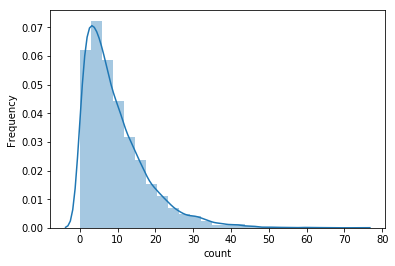

In [662]:
sns.distplot(login_df.iloc[:,0], bins=25)
plt.ylabel('Frequency')
plt.show()

<H3>Group by values To Check For Daily Trends</H3>

In [663]:
day_gby = login_df.groupby(login_df.index.map(lambda t: pd.to_datetime(str(t.hour)+":"+str(t.minute), format="%H:%M")))

day_df = pd.DataFrame(day_gby.median())

day_df['mean'] = day_gby.mean().values

day_df['std'] = day_gby.std().values

day_df['min'] = day_gby.min().values

day_df['max'] = day_gby.max().values

day_df['instances'] = day_gby.count().values

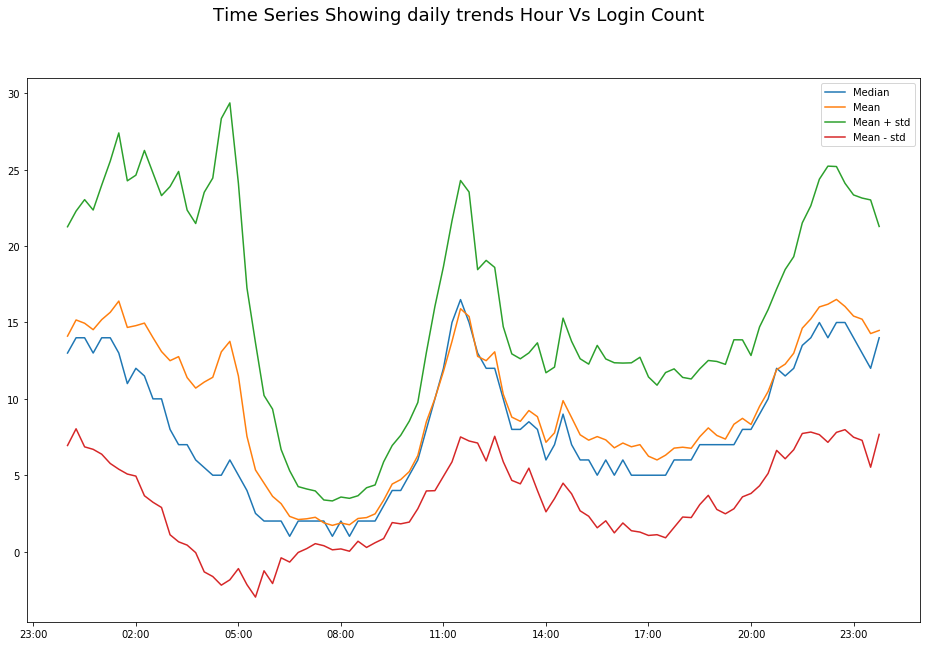

In [664]:
fig = plt.gcf()
ax=plt.gca()

fig.suptitle('Time Series Showing daily trends Hour Vs Login Count', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(16, 10, forward=True)

plt.plot(day_df.index, day_df.iloc[:,0], label='Median')

plt.plot(day_df.index, day_df.iloc[:,1], label='Mean')

plt.plot(day_df.index, day_df.iloc[:,1]+ day_df.iloc[:,2], label='Mean + std')

plt.plot(day_df.index, day_df.iloc[:,1]- day_df.iloc[:,2], label='Mean - std')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend(numpoints = 1)

plt.show()

<H3>Check Weekly Trends</H3>

In [665]:
login_df['weekday'] = login_df.index.weekday

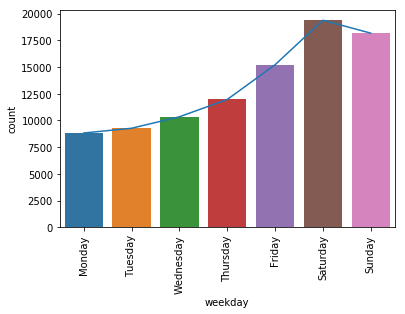

In [666]:
weekday_df = login_df.groupby('weekday').agg(np.sum)

sns.barplot(weekday_df.index, weekday_df.iloc[:,0] )
plt.plot(weekday_df.index, weekday_df.iloc[:,0])
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)

plt.show()

In [667]:
login_df.head()

,count,weekday
login_time,,
1970-01-01 20:00:00,2.0,3
1970-01-01 20:15:00,6.0,3
1970-01-01 20:30:00,9.0,3
1970-01-01 20:45:00,7.0,3
1970-01-01 21:00:00,1.0,3


In [668]:
login_df['month'] = login_df.index.month

login_df.columns = ['logins', 'weekday', 'month']

login_df['weekday'] = login_df['weekday'].map({0:'0Monday', 1:'1Tuesday', 2:'2Wednesday', 3: '3Thursday', 4: '4Friday', 5: '5Saturday', 6: '6Sunday'})

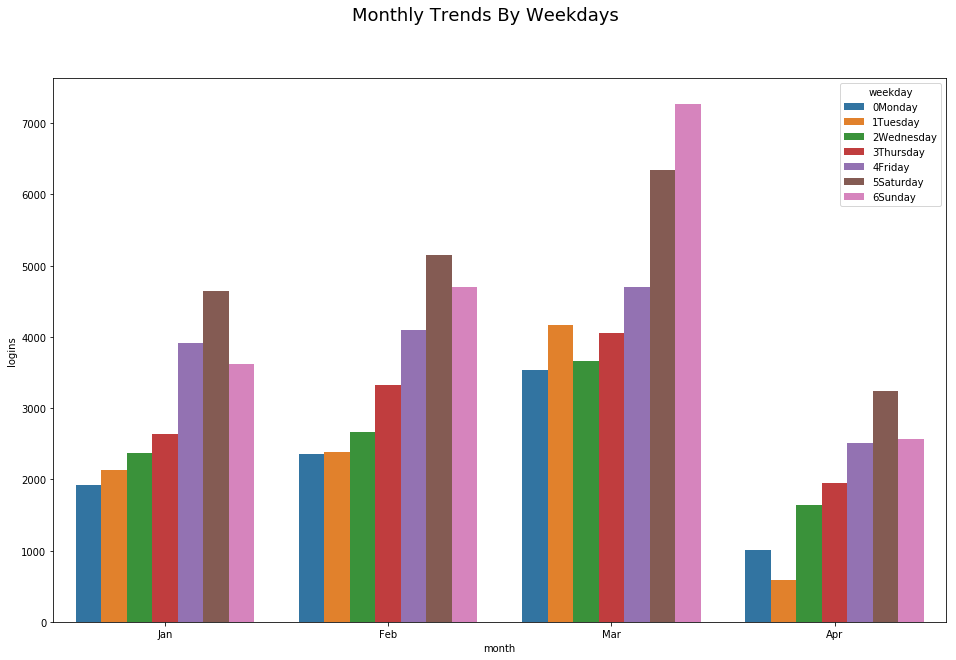

In [669]:
month_df = login_df.groupby(['month', 'weekday']).logins.agg(np.sum).reset_index()

fig = plt.gcf()

fig.suptitle('Monthly Trends By Weekdays', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(16, 10, forward=True)

sns.barplot(x='month', y='logins', hue='weekday', data=month_df)

plt.xticks(range(4), ['Jan', 'Feb', 'Mar', 'Apr'])

plt.show()

In [670]:
max(login_df.index)#April has only 13 days of data

Timestamp('1970-04-13 18:45:00', freq='15T')

In [671]:
min(login_df.index)

Timestamp('1970-01-01 20:00:00', freq='15T')

<H3>Task 1 - Findings</H3>

- There are no missing values.

- The distribution of number of logins is right skewed.

- The demand is more in the mornings and the evening.

- The login standard deviation in the morning is more denoting fluctuation in demand.

- The logins increase from Monday through Sunday but peeks during Saturday during all months except March.

- March deviates from the regular trends. The demand peeks during the sundays.

- April has only half a month of record. A complete April trend can only be predicted.


<H2>Task 2 </H2>

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


    - Though there are other metrics that can be considered, the key metric should be the comparison of the propotion of rides serviced by the driver on the other city before and after the change. The main goal of this change is to encourage the drivers to provide their services on the other city too so that the resources can be leveraged. This metric will be a direct indicator of whether this change has worked or not.
    
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment


    - Equal number of drivers from both the cities should be randomly selected and two rides should be offered simultaniously. One, a ride within the current city of the driver. And two, to the other city. All other influential params like cost and distance should remain the same for both the option. If the driver's preference for both these rides is equal or close to equal the change is a success.
    
b. what statistical test(s) you will conduct to verify the significance of the
observation


    - Hypothesis testing like T test should be performed to know whether the data obtained is statistically significant. The two sample t test can be performed by comparing the number of times the driver prefferd his current city and the number of times he prefer's the other city. 
    
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

    -Null hypothesis - The preference to both the cities is not same.
    -Alternate hypothesis - The preference to both cities is same.
    
    We can reject or keep the null hypothesis through the obtained t-statistic value.
    

<H3> Task 3 </H3>

In [672]:
file = open('../Data/ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [673]:
df = df.dropna()

In [674]:
df['city'] = df['city'].astype('category')
df['phone'] = df['phone'].astype('category')

In [675]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format="%Y-%m-%d")

df['signup_date'] = pd.to_datetime(df['signup_date'], format="%Y-%m-%d")

In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null category
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null category
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 3.3 MB


In [677]:
df['retention'] = (df['last_trip_date'] >= '2014-06-01')

<H3> Below plot shows us that close to 40% of the users signing up have been retained!</H3>

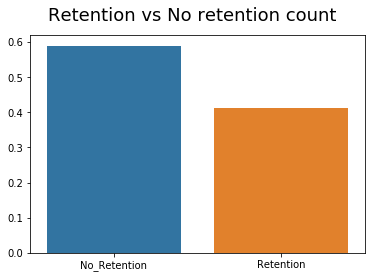

In [678]:
fig = plt.gcf()

fig.suptitle('Retention vs No retention count', 
             fontsize=18, horizontalalignment = 'center')

sns.barplot(x=['No_Retention', 'Retention'], y=[np.size(df[df['retention']==False].retention)/np.size(df.retention), np.sum(df[df['retention']].retention)/np.size(df.retention)] )
plt.show()

<H3> The avg distance travelled between both the populations is similar though the non retention population have a greater variance</H3>

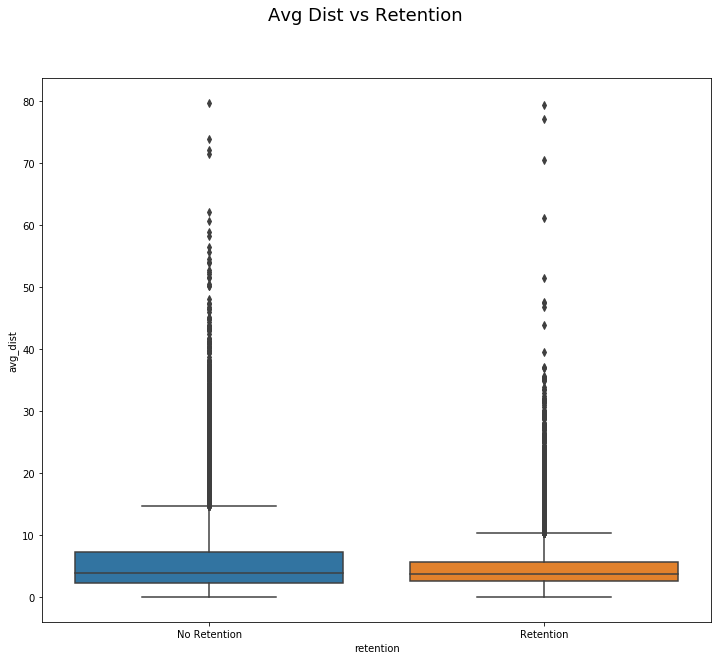

In [679]:
fig = plt.gcf()

fig.suptitle('Avg Dist vs Retention', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(x='retention', y='avg_dist', data=df)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.show()

<H3>The average rating by the driver for the non retention population is higher</H3>

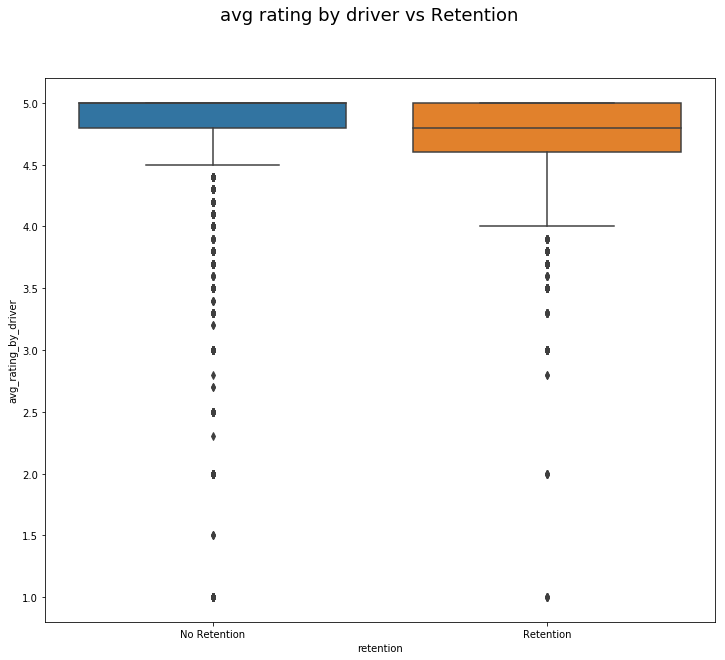

In [680]:
fig = plt.gcf()

fig.suptitle('avg rating by driver vs Retention', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(x='retention', y='avg_rating_by_driver', data=df)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.show()

<H3>The average rating of the driver is higher for the non retention population. </H3>

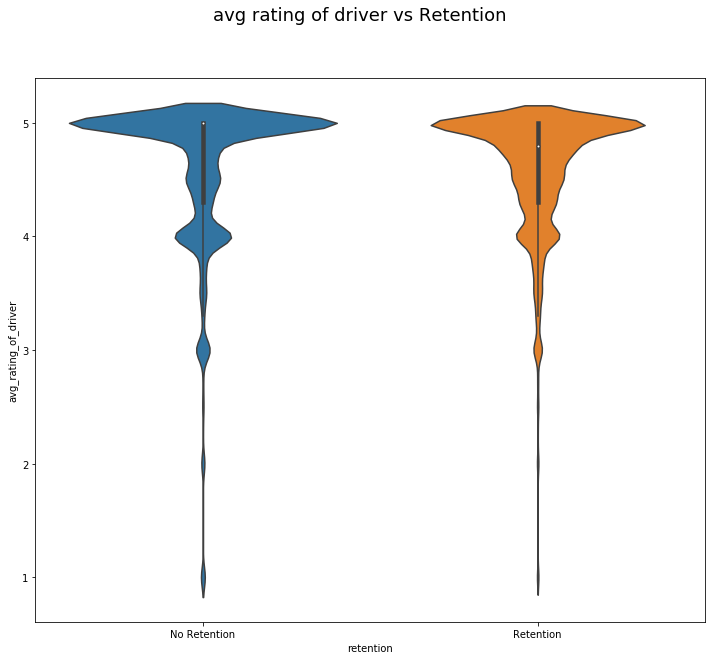

In [681]:
fig = plt.gcf()

fig.suptitle('avg rating of driver vs Retention', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.violinplot(x='retention', y='avg_rating_of_driver', data=df)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.show()

<H3> No much difference between the two populations. The retention population's average surge is slightly higher than their counterparts.</H3>

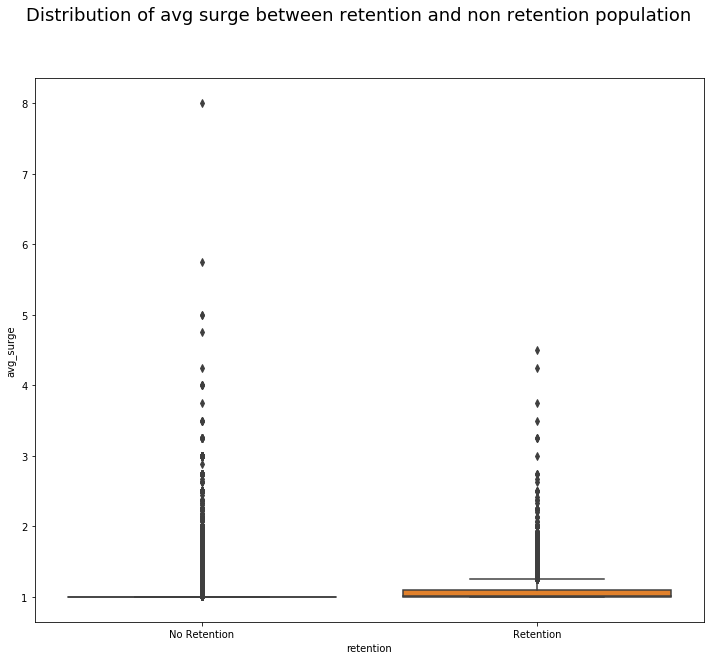

In [682]:
fig = plt.gcf()

fig.suptitle('Distribution of avg surge between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(df['retention'], df['avg_surge'])
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3>The surge pct is higher in retention population</H3>

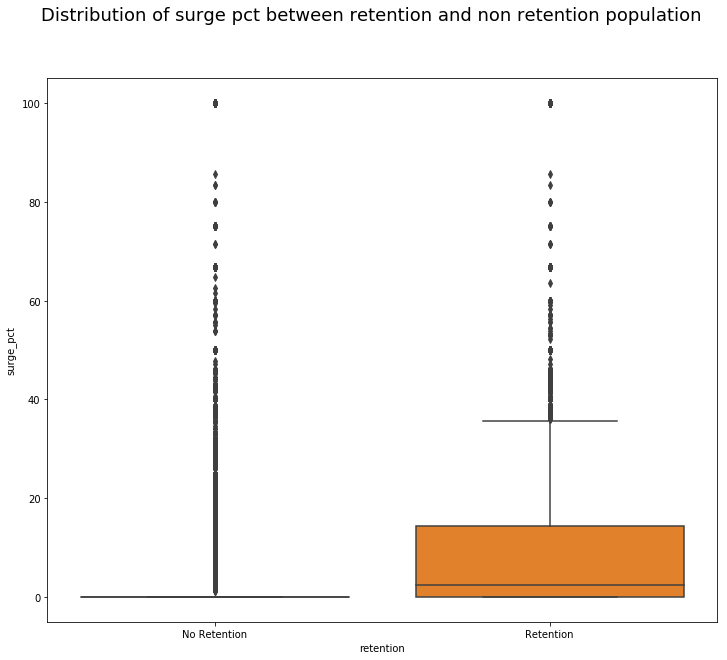

In [683]:
fig = plt.gcf()

fig.suptitle('Distribution of surge pct between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(df['retention'], df['surge_pct'])
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3> The retention population use iphone more.</H3>

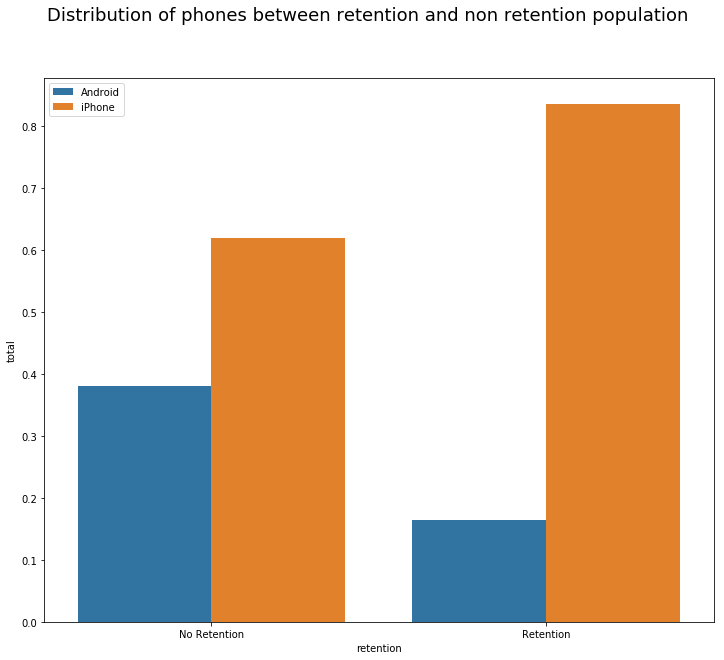

In [684]:
df_phone = df.groupby(['phone', 'retention']).city.agg(np.size)

df_phone = df_phone.reset_index()
df_phone.columns = ['phone', 'retention', 'total']


df_phone.loc[x['retention'], 'total'] = df_phone.loc[df_phone['retention'], 'total']/ df[df['retention']].retention.count()
df_phone.loc[x['retention']!=True, 'total'] = df_phone.loc[df_phone['retention']!=True, 'total']/ df[df['retention']!=True].retention.count()

fig = plt.gcf()

fig.suptitle('Distribution of phones between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.barplot(x='retention', y='total', hue='phone', data=df_phone)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3>The retention population take more trips in the first 30 days</H3>

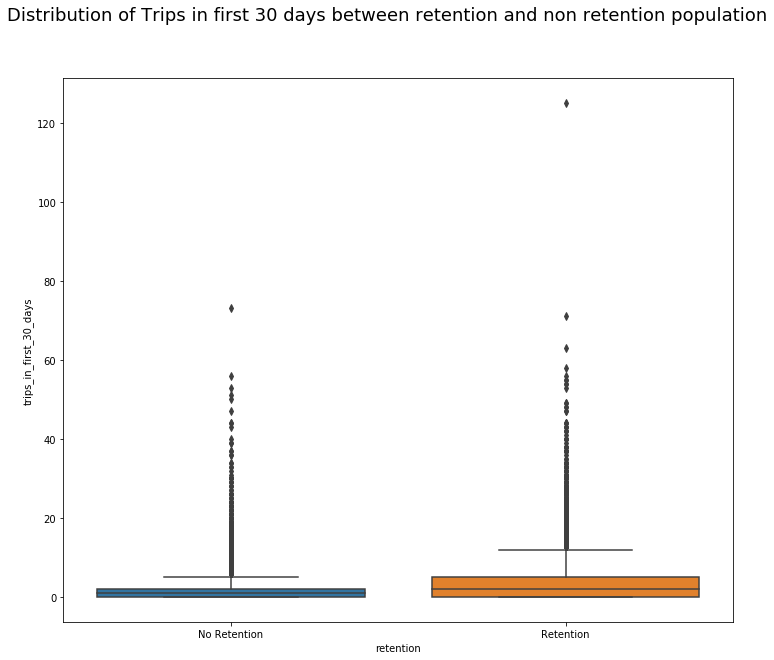

In [685]:
fig = plt.gcf()

fig.suptitle('Distribution of Trips in first 30 days between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(df['retention'], df['trips_in_first_30_days'])
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3> People signing up from king landing seem to be retained more by the company than the people signing up from the other two states</H3>

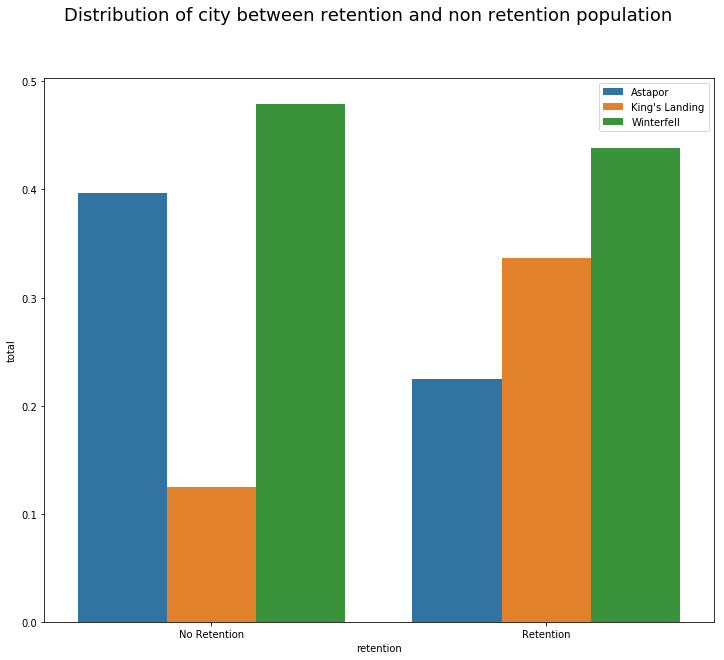

In [686]:
df_city = df.groupby(['city', 'retention']).phone.agg(np.size)

df_city = df_city.reset_index()
df_city.columns = ['city', 'retention', 'total']


df_city.loc[df_city['retention'], 'total'] = df_city.loc[df_city['retention'], 'total']/ df[df['retention']].retention.count()
df_city.loc[df_city['retention']!=True, 'total'] = df_city.loc[df_city['retention']!=True, 'total']/ df[df['retention']!=True].retention.count()

fig = plt.gcf()

fig.suptitle('Distribution of city between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.barplot(x='retention', y='total', hue='city', data=df_city)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3> Most of the non retention population have not used ultimate black while its close to 50/50 in retention population.</H3>

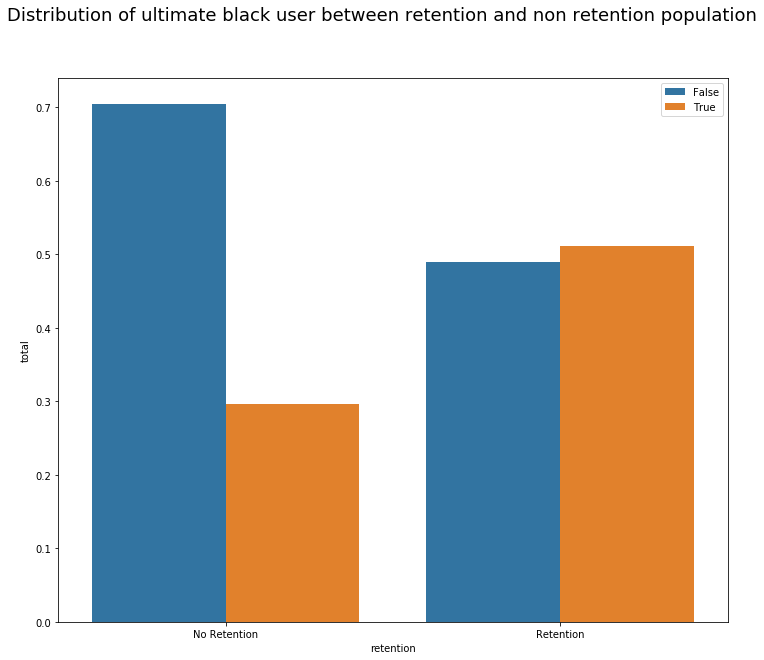

In [687]:

df_ubu = df.groupby(['ultimate_black_user', 'retention']).phone.agg(np.size)

df_ubu = df_ubu.reset_index()
df_ubu.columns = ['ubu', 'retention', 'total']


df_ubu.loc[df_ubu['retention'], 'total'] = df_ubu.loc[df_city['retention'], 'total']/ df[df['retention']].retention.count()
df_ubu.loc[df_ubu['retention']!=True, 'total'] = df_ubu.loc[df_ubu['retention']!=True, 'total']/ df[df['retention']!=True].retention.count()

fig = plt.gcf()

fig.suptitle('Distribution of ultimate black user between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.barplot(x='retention', y='total', hue='ubu', data=df_ubu)
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3> Though the mean weekday percentage is similar in both the populations, the no retention population's weekday pct usage variance is higher.<H3>

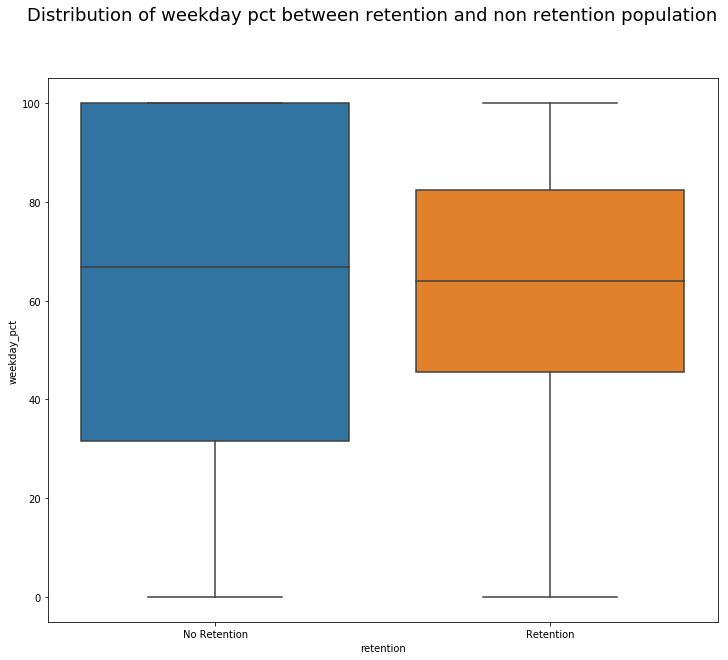

In [688]:


fig = plt.gcf()

fig.suptitle('Distribution of weekday pct between retention and non retention population', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 10, forward=True)

sns.boxplot(df['retention'], df['weekday_pct'])
plt.xticks([0,1], ['No Retention', 'Retention'])
plt.legend()
plt.show()

<H3> Machine Learning</H3>

In [689]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null category
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null category
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
retention                 41445 non-null bool
dtypes: bool(2), category(2), datetime64[ns](2), float64(6), int64(1)
memory usage: 4.6 MB


<H3>Make dataframe ready for machine learning!</H3>

In [691]:
for city in df.city.unique():
    df['city_'+str(city)] = (df['city']==city)
    
df = df.drop('city', axis=1)

for phone in df.phone.unique():
    df['phone_'+str(phone)] = (df['phone'] == phone)
    
df =  df.drop('phone', axis = 1)

In [692]:
df = df.drop('last_trip_date', axis =1)
df = df.drop('signup_date', axis =1)


In [693]:
df['outcome'] = df['retention']
df = df.drop('retention', axis =1)

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
city_King's Landing       41445 non-null bool
city_Astapor              41445 non-null bool
city_Winterfell           41445 non-null bool
phone_iPhone              41445 non-null bool
phone_Android             41445 non-null bool
outcome                   41445 non-null bool
dtypes: bool(7), float64(6), int64(1)
memory usage: 4.1 MB


<H3>Create 70/30 Train Test Split</H3>

In [695]:
Xs = np.array(df.iloc[:,:-1], dtype='f')
ys =  np.array(df.iloc[:,-1], dtype='f')

X_train, X_test,y_train,  y_test = train_test_split(Xs,ys, test_size=0.3, random_state=21)

<H3> 5 fold cross validation with pipeline </H3>

In [698]:
pipe = Pipeline([('selectKBest', SelectKBest()), ('clf', RandomForestClassifier())])
param_grid = {
    'clf__n_estimators' : range(5,10,1),
    'selectKBest__k' : range(2,13,1),
    'clf__class_weight' : ['balanced']
}

grid =GridSearchCV(pipe, param_grid, cv=5 )
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectKBest', SelectKBest(k=10, score_func=<function f_classif at 0x1a1d3a9b70>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_sp...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': range(5, 10), 'selectKBest__k': range(2, 13), 'clf__class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<H3> Train score</H3>

In [699]:
grid.best_score_

0.7335838130364345

<H3>Test score</H3>

In [700]:
y_pred = grid.predict(X_test)
grid.score(X_test, y_test)

0.73604632459385555

<H3> Best Grid Params</H3>

In [701]:
grid.best_params_

{'clf__class_weight': 'balanced', 'clf__n_estimators': 9, 'selectKBest__k': 12}

<H3> Best Features</H3>

In [702]:
features = list(grid.best_estimator_.named_steps['selectKBest'].get_support())
features.append(False)

df.loc[:,features].columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'city_King's Landing', 'city_Astapor', 'city_Winterfell',
       'phone_iPhone', 'phone_Android'],
      dtype='object')

<H3> Confusion Matrix</H3>

In [703]:
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,5769,1490,7259
1.0,1792,3383,5175
All,7561,4873,12434


<H3>Roc curve</H3>

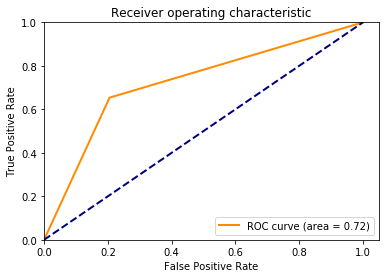

In [704]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<H3> Conclusion </H3>

- Only 40% of the total signed up users are retained. More effective marketing strategies are required to pump up this number.

- The average rating by the driver for the no retention population seems to be higher. This may indicate that we are missing out quality customers.

- The surge pct usage for the non retention population is low.

- The non retention population has higher percentage of android users.

- Wenterfell and Astapor have more percentage of no retentions.

- Close to 70% of no retentions have not used black.

<H3> Suggestions to Ultimate</H3>

- Concentrate on bringing ultimate black to the no retention population.

- Concentrate on Winterfell and Astapor

- Concentrae on Android app. 

- We seem to miss out quality customers. Create marketing campaigns to attract them.